# Mid Season Review

In this notebook I'll be trying to answer a few questions about the performance of players according to Biwenger prices and points (Sofascore) with the data I've collected up to matchday 19 (not every single day is available). I'll be using Pandas.

In [1]:
import pandas as pd

First, the usual exploratory data analysis

In [2]:
df = pd.read_csv("../all_data.csv")
df_copy = df.copy()

In [3]:
df.shape

(21816, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21816 entries, 0 to 21815
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      21816 non-null  object 
 1   Team      21816 non-null  object 
 2   Player    21816 non-null  object 
 3   Position  21816 non-null  object 
 4   Points    21816 non-null  int64  
 5   Price     21816 non-null  int64  
 6   GP        21816 non-null  int64  
 7   Home      21816 non-null  int64  
 8   Away      21816 non-null  int64  
 9   Average   21816 non-null  float64
dtypes: float64(1), int64(5), object(4)
memory usage: 1.7+ MB


In [5]:
df.head()

,Date,Team,Player,Position,Points,Price,GP,Home,Away,Average
0,2025-07-11,Liverpool,Salah,Forward,0,16610000,0,0,0,0.0
1,2025-07-11,Chelsea,Cole Palmer,Midfielder,0,16000000,0,0,0,0.0
2,2025-07-11,Liverpool,Florian Wirtz,Midfielder,0,14920000,0,0,0,0.0
3,2025-07-11,Newcastle,Isak,Forward,0,14340000,0,0,0,0.0
4,2025-07-11,Brentford FC,Mbeumo,Forward,0,14220000,0,0,0,0.0


In [6]:
df.describe()

,Points,Price,GP,Home,Away,Average
count,21816.000000,2.181600e+04,21816.000000,21816.000000,21816.000000,21816.000000
mean,20.609186,2.185021e+06,5.121608,2.557343,2.564265,2.104208
std,29.524507,2.770625e+06,6.304535,3.192131,3.190088,2.212787
min,-1.000000,1.500000e+05,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,3.400000e+05,0.000000,0.000000,0.000000,0.000000
50%,6.000000,1.150000e+06,3.000000,1.000000,1.000000,2.000000
75%,31.000000,2.950000e+06,8.000000,4.000000,4.000000,3.800000
max,211.000000,2.116000e+07,23.000000,12.000000,12.000000,13.380000


In [7]:
# Check for missing values in each colum
df.isna().sum()

Date        0
Team        0
Player      0
Position    0
Points      0
Price       0
GP          0
Home        0
Away        0
Average     0
dtype: int64

Everything seems to be fine with the dataset :)

## Cleaning

To keep relevant information only, let's drop all players who have played less than the average (GP = 4), to establish a simple filter:

In [8]:
below_avg_GP = (
    df.groupby("Player")["GP"]
      .max()
      .loc[lambda x: x < 4]
      .index
      .tolist()
)

df = df[~df["Player"].isin(below_avg_GP)]

df.shape

(15712, 10)

Now drop every row before the day Premier League started (15-08-2025):

In [9]:
df["Date"] = pd.to_datetime(df["Date"])
df = df[df["Date"] > "15-08-2025"]
df.shape

(12035, 10)

We went from more than 20122 rows to 10703. That's a major cleaning, but it does help to visualize relevant data, i.e., that affected by the dynamics of matchdays.

In [10]:
latest = df[df["Date"]==df["Date"].max()]
latest.shape

(424, 10)

The whole dataset contains information of 422 players, which is decent, I think.

## Distributions

Now let's look at distributions. Since there are several entries for the same list of players depending on the date, I'll create a separate dataframe with summarized features for each player. I'll show the original distributions first anyways: 

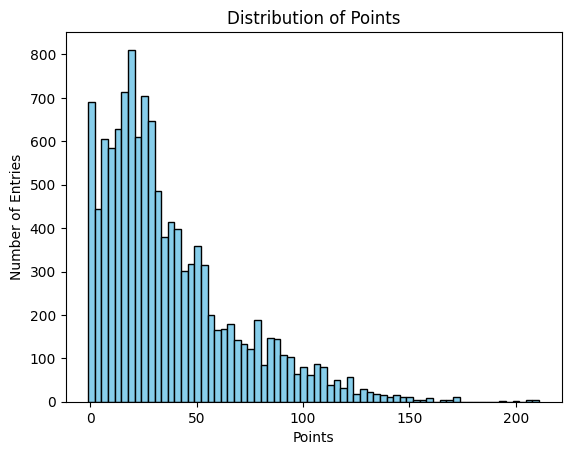

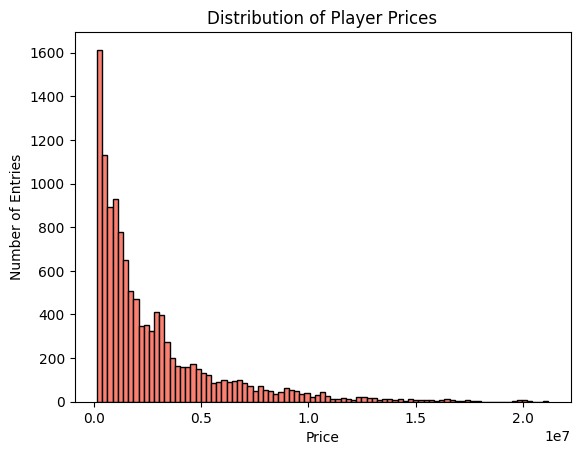

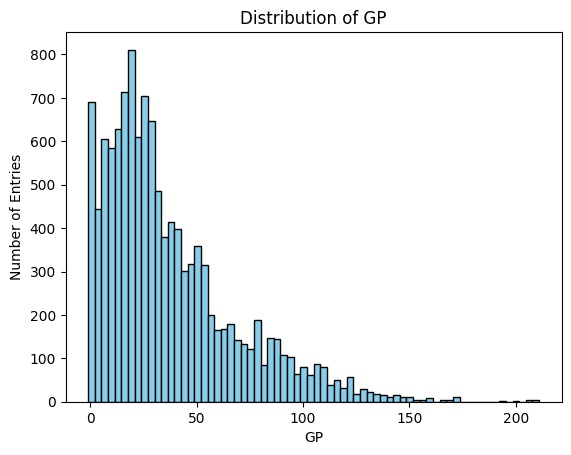

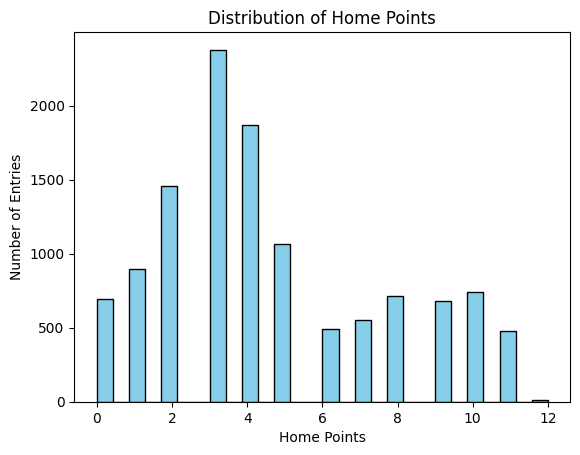

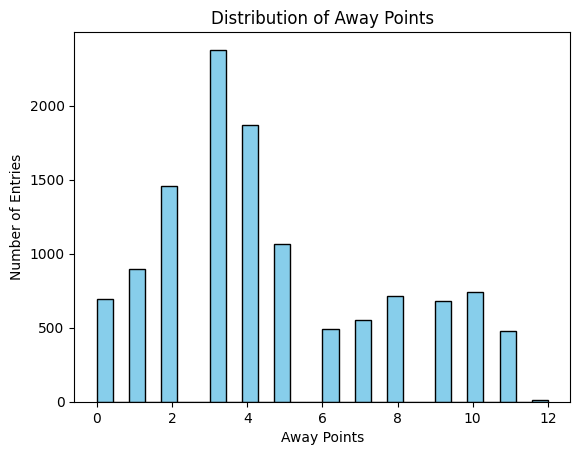

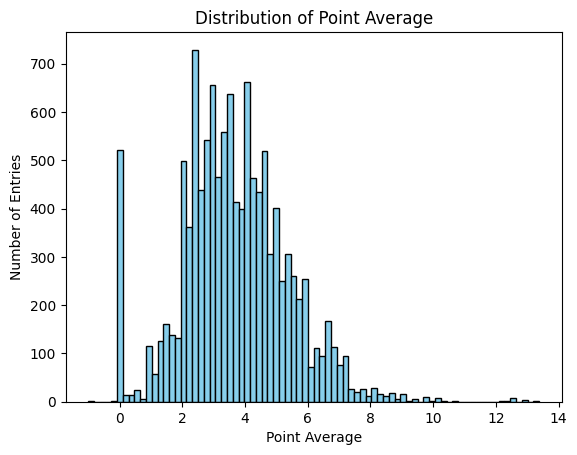

In [11]:
import matplotlib.pyplot as plt
# Plot Points original distribution
plt.hist(df['Points'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Distribution of Points')
plt.xlabel('Points')
plt.ylabel('Number of Entries')
plt.show()

# Plot Price original distribution
plt.hist(df['Price'], bins="auto", color='salmon', edgecolor='black')
plt.title('Distribution of Player Prices')
plt.xlabel('Price')
plt.ylabel('Number of Entries')
plt.show()

# GP original distribution
plt.hist(df['Points'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Distribution of GP')
plt.xlabel('GP')
plt.ylabel('Number of Entries')
plt.show()

# Plot Home distribution
plt.hist(df['Home'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Distribution of Home Points')
plt.xlabel('Home Points')
plt.ylabel('Number of Entries')
plt.show()

# Plot Away distribution
plt.hist(df['Home'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Distribution of Away Points')
plt.xlabel('Away Points')
plt.ylabel('Number of Entries')
plt.show()

# Plot Point Average distribution
plt.hist(df['Average'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Distribution of Point Average')
plt.xlabel('Point Average')
plt.ylabel('Number of Entries')
plt.show()

As you can see, they're skewed towards the left. However, the cleaning made it possible to get somewhat manageable distributions. You can verify yourself skipping it and plotting the distributions:

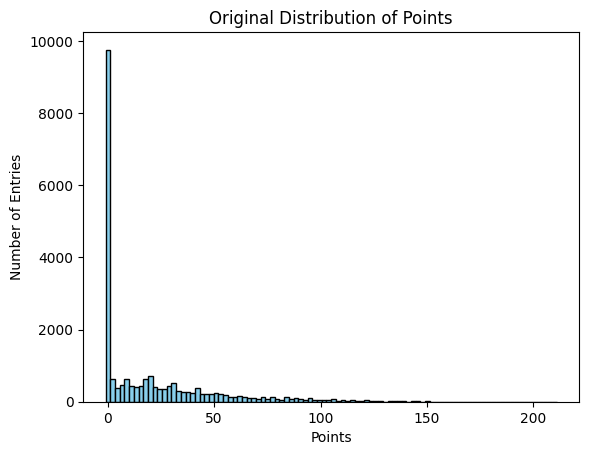

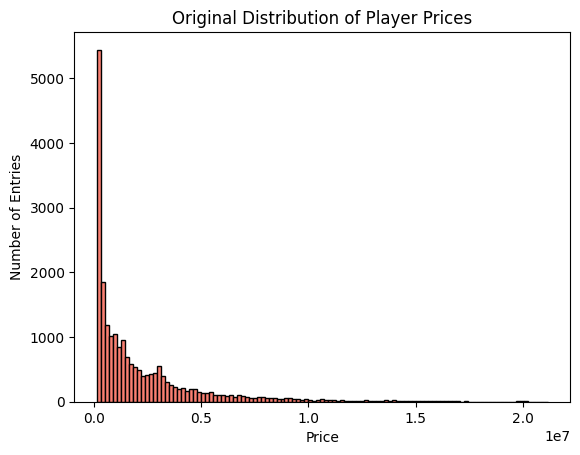

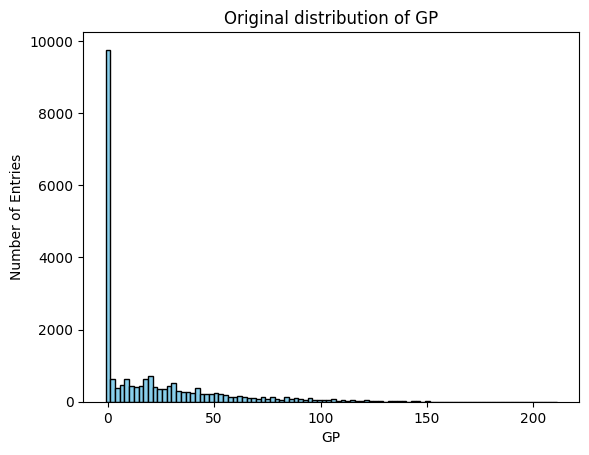

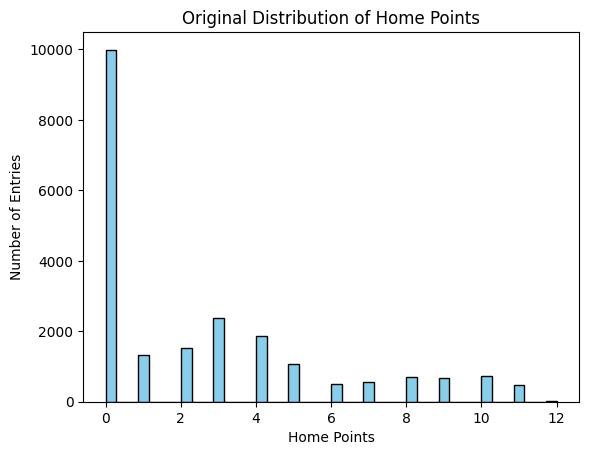

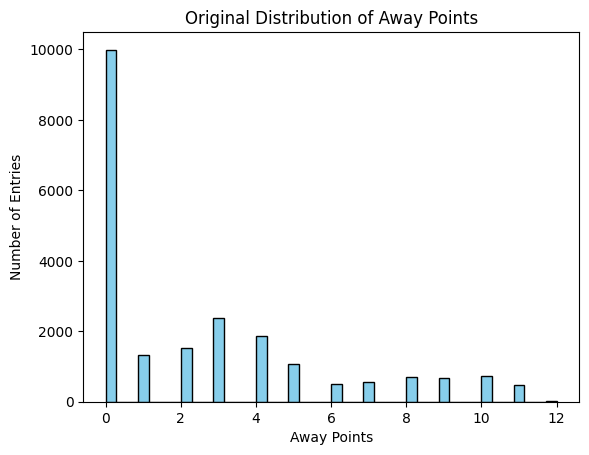

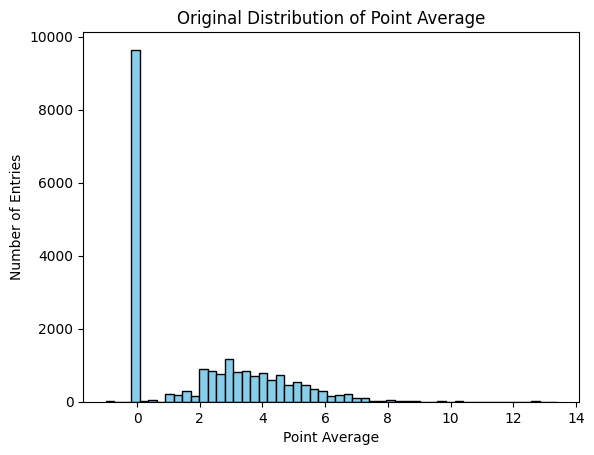

In [12]:
import matplotlib.pyplot as plt
# Plot Points original distribution
plt.hist(df_copy['Points'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Original Distribution of Points')
plt.xlabel('Points')
plt.ylabel('Number of Entries')
plt.show()

# Plot Price original distribution
plt.hist(df_copy['Price'], bins="auto", color='salmon', edgecolor='black')
plt.title('Original Distribution of Player Prices')
plt.xlabel('Price')
plt.ylabel('Number of Entries')
plt.show()

# GP original distribution
plt.hist(df_copy['Points'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Original distribution of GP')
plt.xlabel('GP')
plt.ylabel('Number of Entries')
plt.show()

# Plot Home distribution
plt.hist(df_copy['Home'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Original Distribution of Home Points')
plt.xlabel('Home Points')
plt.ylabel('Number of Entries')
plt.show()

# Plot Away distribution
plt.hist(df_copy['Home'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Original Distribution of Away Points')
plt.xlabel('Away Points')
plt.ylabel('Number of Entries')
plt.show()

# Plot Point Average distribution
plt.hist(df_copy['Average'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Original Distribution of Point Average')
plt.xlabel('Point Average')
plt.ylabel('Number of Entries')
plt.show()

To try and get a bit more information, I'll adjust the data for each distribution. 

For the price, it's actually useful to use the average of all entries in `df`.

In [13]:
ps = df.groupby('Player').agg({ #player summary
    'Points':'mean',
    'Price':'mean',
    'GP':'mean',
    'Average':'mean'
}).reset_index()

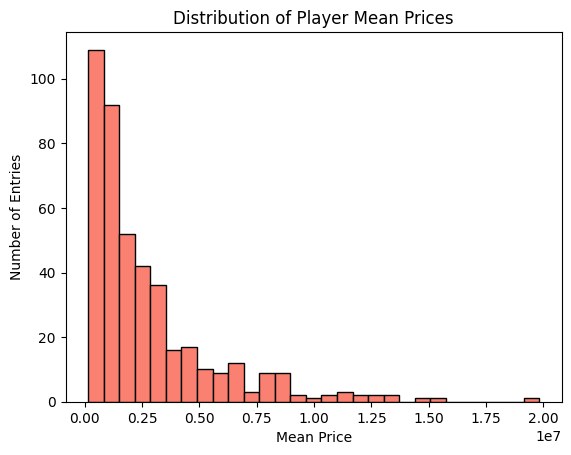

In [14]:
# Plot Price distribution
plt.hist(ps['Price'], bins="auto", color='salmon', edgecolor='black')
plt.title('Distribution of Player Mean Prices')
plt.xlabel('Mean Price')
plt.ylabel('Number of Entries')
plt.show()

Looks similar to the original. 

We can also filter the latest date available:

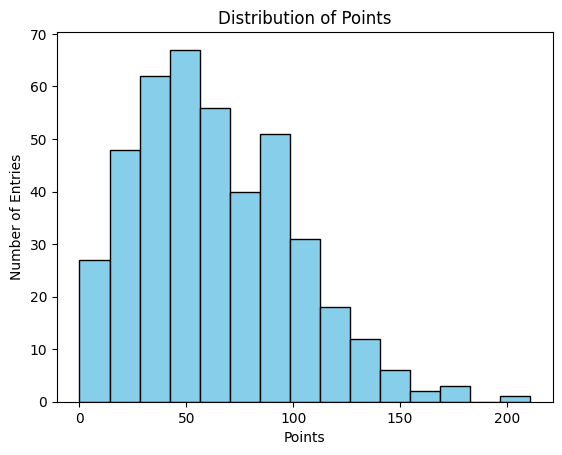

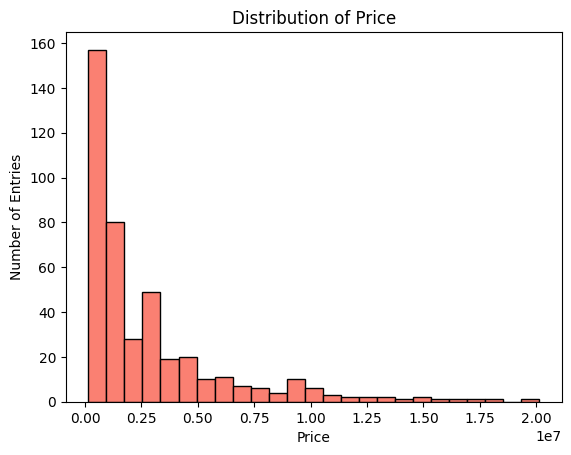

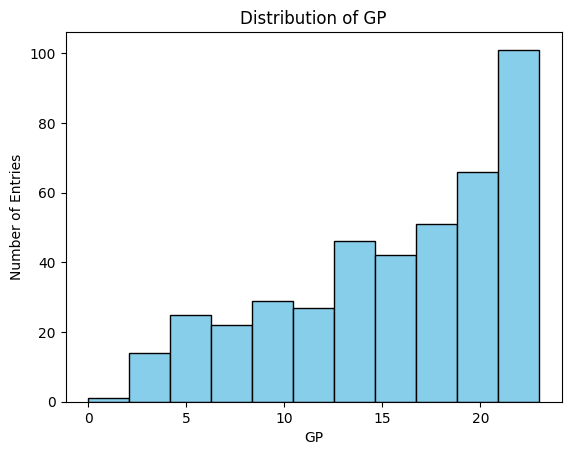

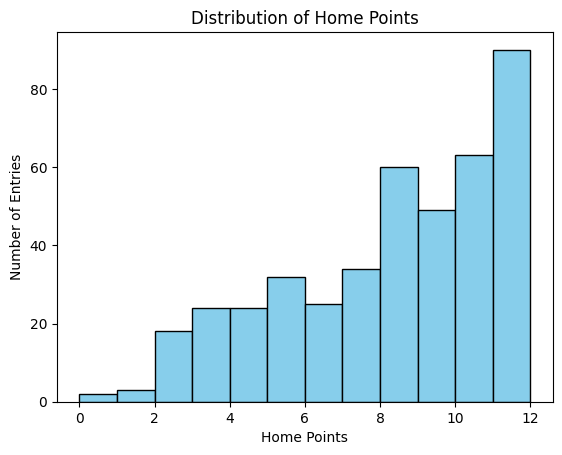

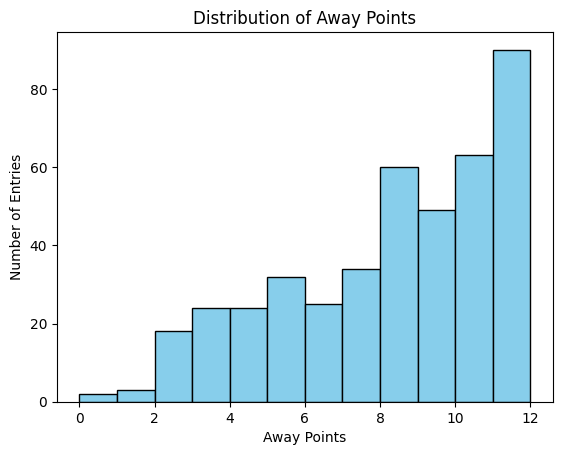

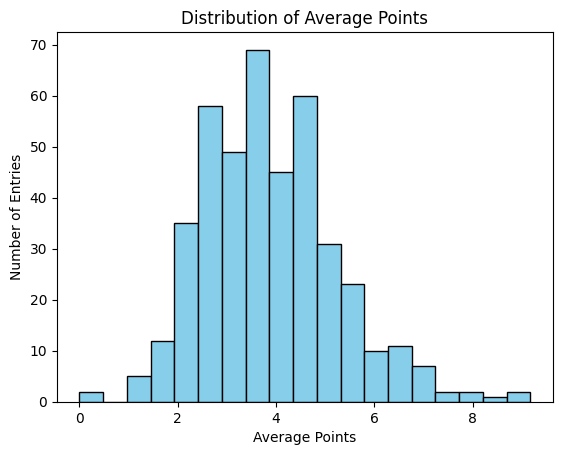

In [15]:
latest_date = df["Date"].max()

df_14 = df[df['Date'] == latest_date]

# Plot Points distribution
plt.hist(df_14['Points'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Distribution of Points')
plt.xlabel('Points')
plt.ylabel('Number of Entries')
plt.show()

# Plot Price distribution
plt.hist(df_14['Price'], bins="auto", color='salmon', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Number of Entries')
plt.show()

# Plot GP distribution
plt.hist(df_14['GP'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Distribution of GP')
plt.xlabel('GP')
plt.ylabel('Number of Entries')
plt.show()

# Plot Home distribution
plt.hist(df_14['Home'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Distribution of Home Points')
plt.xlabel('Home Points')
plt.ylabel('Number of Entries')
plt.show()

# Plot Away distribution
plt.hist(df_14['Home'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Distribution of Away Points')
plt.xlabel('Away Points')
plt.ylabel('Number of Entries')
plt.show()

# Plot Average distribution
plt.hist(df_14['Average'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Distribution of Average Points')
plt.xlabel('Average Points')
plt.ylabel('Number of Entries')
plt.show()

Skewed, but much more balanced and make more sense. Notice that cumutative columns are now far less skewed or skewed towards the right. This definetly means that are being affected by earlier matchdays unnecesairly. Therefore, to analyze these, it'll probably be better to use `df_14`; as for the price, I should take `df`.

## Correlation

Next step is the correlation overview. Let's take the whole dataset and just eliminate players who haven't played a single game yet.

In [16]:
numeric_cols = ['Points', 'Price', 'GP', 'Home', 'Away', 'Average']
df_numeric = df[numeric_cols]

corr_matrix = df_numeric.corr()
print(corr_matrix)

           Points     Price        GP      Home      Away   Average
Points   1.000000  0.607724  0.865207  0.849409  0.840028  0.647424
Price    0.607724  1.000000  0.296826  0.298729  0.280870  0.702134
GP       0.865207  0.296826  1.000000  0.976302  0.976334  0.333417
Home     0.849409  0.298729  0.976302  1.000000  0.906393  0.333041
Away     0.840028  0.280870  0.976334  0.906393  1.000000  0.318006
Average  0.647424  0.702134  0.333417  0.333041  0.318006  1.000000


Now let's do the same for the latest matchday dataset:

In [17]:
df_14_numeric = df_14[numeric_cols]
corr_matrix = df_14_numeric.corr()
print(corr_matrix)

           Points     Price        GP      Home      Away   Average
Points   1.000000  0.817326  0.801662  0.779863  0.761546  0.862436
Price    0.817326  1.000000  0.483064  0.481543  0.447322  0.792073
GP       0.801662  0.483064  1.000000  0.961205  0.961517  0.454722
Home     0.779863  0.481543  0.961205  1.000000  0.848429  0.450870
Away     0.761546  0.447322  0.961517  0.848429  1.000000  0.423488
Average  0.862436  0.792073  0.454722  0.450870  0.423488  1.000000


### Key insights

1. The correlation between Price and Points is much higher in `df_14`. This could be because the current price is closer in time to the latest performance, whereas in `df` is a general view.

2. For `df`, the highest correlation for Price happens with Average, not with Points; maybe it's caused by the fact that Average contains more information about the global performance.

3. Home and Away points are very correlated, stating that good performers would usually do well despite the stadium.

4. GP is highly correlated to Points, Home, and Away, but not to Average.

5. Price does not have a considerable correlation with GP, Home, or Away in `df`.

## Questions

Now that we're done with the EDA, let's move on to some questions this dataset could answer using Machine Learning.

1. Does performance vary across teams?
2. Can performance features + price group players by position?
3. What features are better to predict Price?

## Does performance vary across teams?

To answer this, we will perform an ANOVA test, which will tell us if the means of performance features vary significantly across teams.

Let's first check the assumptions necessary for the test: normality, with Shapiro-Wilk test, and similar variancies, with Levene's test; since both tests need continous data, we will use Average as our performance feature. I'll use `df_14` because it captures performance features better.

In [18]:
from scipy.stats import f_oneway, levene, shapiro

teams = df_14['Team'].unique()

# Group data by team
grouped_data = [df_14[df_14['Team'] == team]['Average'] for team in teams]

# 1a. Normality test (Shapiro-Wilk) per team
for team, data in zip(teams, grouped_data):
    stat, p = shapiro(data)
    print(f"{team}: Shapiro-Wilk p = {p:.3f}")

# 1b. Homogeneity of variances (Levene's test)
stat, p = levene(*grouped_data)
print(f"Levene test p = {p:.3f}")

Manchester City: Shapiro-Wilk p = 0.492
Newcastle: Shapiro-Wilk p = 0.006
Arsenal: Shapiro-Wilk p = 0.516
Manchester United: Shapiro-Wilk p = 0.031
Brighton & Hove Albion: Shapiro-Wilk p = 0.027
Fulham: Shapiro-Wilk p = 0.391
Brentford FC: Shapiro-Wilk p = 0.648
Liverpool: Shapiro-Wilk p = 0.227
Sunderland: Shapiro-Wilk p = 0.751
Chelsea: Shapiro-Wilk p = 0.650
Everton: Shapiro-Wilk p = 0.220
West Ham United: Shapiro-Wilk p = 0.828
Tottenham: Shapiro-Wilk p = 0.683
Nottingham Forest: Shapiro-Wilk p = 0.595
AFC Bournemouth: Shapiro-Wilk p = 0.980
Crystal Palace: Shapiro-Wilk p = 0.321
Aston Villa: Shapiro-Wilk p = 0.205
Burnley: Shapiro-Wilk p = 0.070
Leeds United: Shapiro-Wilk p = 0.423
Wolverhampton: Shapiro-Wilk p = 0.489
Levene test p = 0.257


Only Newcastle and Brighton fail the normality test, but we will proceed anyway as it's only two teams.

In [19]:
anova_result = f_oneway(*grouped_data)
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

F-statistic: 2.5169722315953247
p-value: 0.0004742405308842538


The F-statistic indicates the variance of means across teams is 2.82 times larger than the variance across players from the same team. The p-value clearly rejects that means across teams are equal. 

Therefore, performance depends on the team. 

Let's do a quick visualization of which teams perform better:

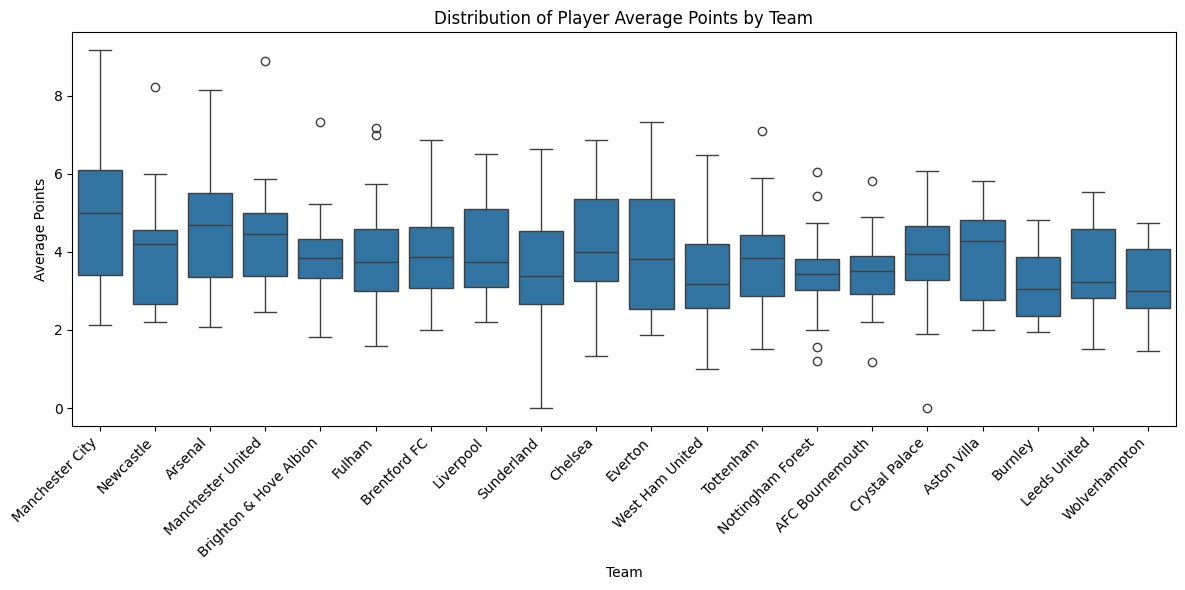

In [20]:
import seaborn as sns

# Make a boxplot of Average points by Team
plt.figure(figsize=(12,6))
sns.boxplot(x='Team', y='Average', data=df_14)
plt.xticks(rotation=45, ha='right')  # Rotate team names for readability
plt.title('Distribution of Player Average Points by Team')
plt.ylabel('Average Points')
plt.xlabel('Team')
plt.tight_layout()
plt.show()

### Some insights

1. Outperformers are much more common in mid-table teams. 

2. Manchester City and Aston Villa have the strongest performers (highest median). Arsenal is a close second. 

3. West Ham is terrible.

4. Only three outperformers are better than Arsenal's best player.

## Can performance + price features group players by position?

### K-nearest neighbours

First, I'll try a supervised method: K-nearest neighbours, as it works well with fewer features and not a huge sample. The features included will be Price, Average, and Home; Away is discarded because its correlation with Home is too high. Once again I'll use `df_14`.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np

Let's first find the optimal `k`:

In [22]:
features = ['Average', 'Price', "Away"]
target = 'Position'

X = df_14[features]
y = df_14[target]

# Split into train/test; 0.2 as the dataset is only 422 rows large; y as the split is categorical
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Finding the optimal k
k_range = range(1, 31)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

optimal_k = k_range[np.argmax(cv_scores)]
print("Optimal k:", optimal_k)

Optimal k: 27


In [23]:
knn = KNeighborsClassifier(n_neighbors=21)

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[14  9  0  8]
 [14  4  0  6]
 [ 5  1  0  0]
 [15  5  0  4]]

Classification Report:
               precision    recall  f1-score   support

    Defender       0.29      0.45      0.35        31
     Forward       0.21      0.17      0.19        24
  Goalkeeper       0.00      0.00      0.00         6
  Midfielder       0.22      0.17      0.19        24

    accuracy                           0.26        85
   macro avg       0.18      0.20      0.18        85
weighted avg       0.23      0.26      0.24        85



/home/diego/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Not great, honestly. It can't identify goalkeepers. Let's try a logistic regression.

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    multi_class='multinomial',  # handle multi-class
    solver='lbfgs',             # suitable for small/medium datasets
    max_iter=1000,
    class_weight = "balanced",
    random_state=42
)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

/home/diego/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Confusion Matrix:
 [[11  1 13  6]
 [ 7  4  9  4]
 [ 2  1  2  1]
 [ 8  6  5  5]]

Classification Report:
               precision    recall  f1-score   support

    Defender       0.39      0.35      0.37        31
     Forward       0.33      0.17      0.22        24
  Goalkeeper       0.07      0.33      0.11         6
  Midfielder       0.31      0.21      0.25        24

    accuracy                           0.26        85
   macro avg       0.28      0.27      0.24        85
weighted avg       0.33      0.26      0.28        85



Simpler was worse this time. Let's try Random Forest for the sake of exploring more methods.

### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight

In [26]:
#classes = np.unique(y_train)
#weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
#class_weights = dict(zip(classes, weights))

rf = RandomForestClassifier(
    n_estimators=200,# number of trees
    oob_score = True,
    max_depth=None,          # None = expand until all leaves are pure or contain < min_samples_split
    random_state=42,
    #class_weight=class_weights
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(rf.oob_score_)

Confusion Matrix:
 [[14  9  0  8]
 [11 11  0  2]
 [ 2  2  1  1]
 [ 7  5  1 11]]

Classification Report:
               precision    recall  f1-score   support

    Defender       0.41      0.45      0.43        31
     Forward       0.41      0.46      0.43        24
  Goalkeeper       0.50      0.17      0.25         6
  Midfielder       0.50      0.46      0.48        24

    accuracy                           0.44        85
   macro avg       0.45      0.38      0.40        85
weighted avg       0.44      0.44      0.43        85

0.32448377581120946


Random Forest was the most accurate, but the limited features, small dataset, and imbalanced classes made it difficult to improve.

Let's try now an unsupervised method and see what we get.

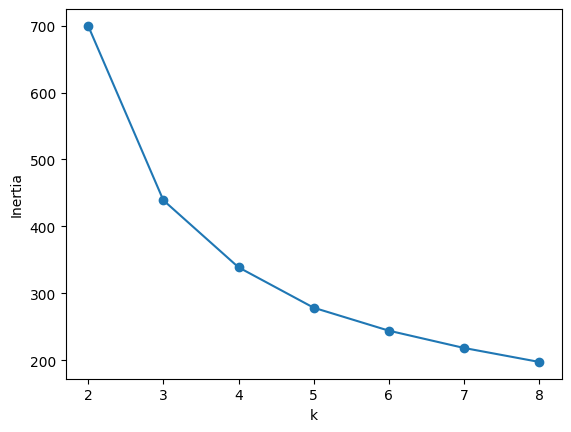

In [27]:
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K = range(2, 9)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

In [28]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df_14['Cluster'] = clusters

/tmp/ipykernel_835687/3481308900.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_14['Cluster'] = clusters


In [29]:
pd.crosstab(df_14['Cluster'], df_14['Position'], normalize='index')

Position,Defender,Forward,Goalkeeper,Midfielder
Cluster,,,,
0,0.336538,0.240385,0.125000,0.298077
1,0.379310,0.321839,0.103448,0.195402
2,0.170732,0.317073,0.000000,0.512195
3,0.379310,0.310345,0.051724,0.258621
4,0.460526,0.223684,0.013158,0.302632


The optimal number of clusters it's definitely not 4. The toughest class to spot is definitely GK. More features are needed.

To answer the question, the positions do not seem to be a great indicator of what a player's performance or price is going to be. The classes of players might be tied to other ways of thinking, not positions.

I'm pretty sure that by taking the top 50 or top 100 performers, the classification might work a lot better.

## What features are better to predict Price?

Now, I'm gonna use the whole dataset to try and predict the price of a player. Let's first standarize the dataset

In [30]:
X = pd.get_dummies(
    df[['GP', 'Home', 'Away', 'Average', 'Team']],
    drop_first=True
)

num_cols = ['GP', 'Home', 'Away', 'Average']

X_std = X.copy()

for col in num_cols:
    mu = X[col].mean()
    sigma = X[col].std()
    X_std[col] = (X[col] - mu) / sigma

In [31]:
X_std[num_cols].mean()

GP        -3.778541e-17
Home      -1.511416e-16
Away      -1.889270e-16
Average    1.086330e-16
dtype: float64

In [32]:
X_std[num_cols].std()

GP         1.0
Home       1.0
Away       1.0
Average    1.0
dtype: float64

In [33]:
X_std.isna().sum().sort_values(ascending=False) #NO NA's

GP                             0
Home                           0
Away                           0
Average                        0
Team_Arsenal                   0
Team_Aston Villa               0
Team_Brentford FC              0
Team_Brighton & Hove Albion    0
Team_Burnley                   0
Team_Chelsea                   0
Team_Crystal Palace            0
Team_Everton                   0
Team_Fulham                    0
Team_Leeds United              0
Team_Liverpool                 0
Team_Manchester City           0
Team_Manchester United         0
Team_Newcastle                 0
Team_Nottingham Forest         0
Team_Sunderland                0
Team_Tottenham                 0
Team_West Ham United           0
Team_Wolverhampton             0
dtype: int64

The standarization worked. Let's check the correlation:

In [34]:
X_std[num_cols].corr()

,GP,Home,Away,Average
GP,1.000000,0.976302,0.976334,0.333417
Home,0.976302,1.000000,0.906393,0.333041
Away,0.976334,0.906393,1.000000,0.318006
Average,0.333417,0.333041,0.318006,1.000000


In [35]:
y = df['Price']

y_std = (y - y.mean()) / y.std()

X_train, X_test, y_train, y_test = train_test_split(
    X_std, y_std, test_size=0.2, random_state=42
)

Before more complicated models, let's try an ordinary linear regression:

In [36]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
ols.fit(X_train, y_train)

from sklearn.metrics import r2_score, mean_absolute_error

y_pred = ols.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"r2 = {r2}, mae = {mae}")

r2 = 0.561302408522887, mae = 0.47904613409369756


In [37]:
coef = pd.Series(
    ols.coef_,
    index=X_train.columns
).sort_values()

coef

Team_Wolverhampton            -0.141592
Team_Leeds United             -0.066504
Team_Brighton & Hove Albion   -0.058296
Team_Burnley                  -0.044241
Team_Brentford FC             -0.042276
Team_Fulham                   -0.034705
Away                          -0.012837
Team_Sunderland               -0.008449
GP                             0.030667
Team_Aston Villa               0.053375
Home                           0.072747
Team_Crystal Palace            0.075944
Team_Nottingham Forest         0.112165
Team_West Ham United           0.157241
Team_Everton                   0.239877
Team_Tottenham                 0.257699
Team_Manchester United         0.276887
Team_Newcastle                 0.281335
Team_Chelsea                   0.513564
Average                        0.609287
Team_Manchester City           0.664793
Team_Arsenal                   0.752855
Team_Liverpool                 0.760978
dtype: float64

This is decent enough to continue. Let's use Elastic Net to identify the most useful coefficients:

In [38]:
from sklearn.linear_model import ElasticNetCV

# Five cross validation folds and an equal combination of Lasso and Ridge
elastic = ElasticNetCV(l1_ratio=0.5, cv=5, random_state=42, n_jobs=-1)

# Fit model
elastic.fit(X_std, y_std)

print(f"Best lambda (alpha) chosen by CV: {elastic.alpha_:.2e}")
print(f"R^2 on training data: {elastic.score(X_std, y_std):.3f}")

# Collect coefficients in a DataFrame for readability
coef_df = pd.Series(elastic.coef_, index=X_std.columns).sort_values()
print("\nCoefficients:")
print(coef_df)

# Optional: identify "selected" features (non-zero coefficients)
selected_features = coef_df[coef_df != 0]
print("\nSelected features:")
print(selected_features)

Best lambda (alpha) chosen by CV: 1.40e-03
R^2 on training data: 0.573

Coefficients:
Team_Wolverhampton            -0.189349
Team_Leeds United             -0.118726
Team_Brighton & Hove Albion   -0.106787
Team_Brentford FC             -0.094700
Team_Burnley                  -0.094667
Team_Fulham                   -0.092813
Team_Sunderland               -0.071329
Team_Aston Villa              -0.009944
Team_Crystal Palace            0.000000
Away                           0.000000
Team_Nottingham Forest         0.011077
GP                             0.036106
Home                           0.053861
Team_West Ham United           0.063666
Team_Everton                   0.155302
Team_Manchester United         0.165228
Team_Tottenham                 0.169721
Team_Newcastle                 0.202693
Team_Chelsea                   0.474346
Team_Manchester City           0.562231
Average                        0.604938
Team_Arsenal                   0.688728
Team_Liverpool                 0.6

The model scores seem very decent and consistent with OLR. Let's drop `Away` and `Team_Crystal Palace` and proceed with a Random Forest Regressor:

In [39]:
from sklearn.ensemble import RandomForestRegressor

# Surviving features from ElasticNet
selected_features = [
    'Average', 'Home', 'GP',
    'Team_Wolverhampton', 'Team_Leeds United', 'Team_Brighton & Hove Albion',
    'Team_Brentford FC', 'Team_Sunderland', 'Team_Fulham', 'Team_Burnley',
    'Team_Aston Villa', 'Team_Nottingham Forest', 'Team_West Ham United',
    'Team_Everton', 'Team_Manchester United', 'Team_Tottenham', 'Team_Newcastle',
    'Team_Chelsea', 'Team_Manchester City', 'Team_Arsenal', 'Team_Liverpool'
]

X_rf = X_std[selected_features]  # features
y_rf = y  # target in original units (Random Forest doesn't require standardization)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestRegressor(
    n_estimators=500,      # number of trees
    max_depth=None,         # grow until leaves are pure or min_samples_split
    min_samples_leaf=1,     # minimum samples per leaf
    random_state=42,
    n_jobs=-1
)

# Fit
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"R²: {r2:.3f}, MAE: {mae:.2f}")

# Feature importances
importances = pd.Series(rf.feature_importances_, index=selected_features).sort_values(ascending=False)
print("\nFeature importances:")
print(importances)


R²: 0.920, MAE: 397172.06

Feature importances:
Average                        0.707196
GP                             0.086289
Home                           0.070748
Team_Liverpool                 0.027262
Team_Arsenal                   0.020045
Team_Manchester City           0.017820
Team_Chelsea                   0.016904
Team_Manchester United         0.010106
Team_Newcastle                 0.007461
Team_Tottenham                 0.005476
Team_Wolverhampton             0.004188
Team_West Ham United           0.004045
Team_Aston Villa               0.003476
Team_Nottingham Forest         0.003050
Team_Sunderland                0.003043
Team_Fulham                    0.002837
Team_Everton                   0.002352
Team_Burnley                   0.002264
Team_Brighton & Hove Albion    0.002238
Team_Brentford FC              0.001780
Team_Leeds United              0.001420
dtype: float64


Obviously this R² is really good. However, I'll split the data by date so that I can make sure no future information is causing some sort of data leaking. The cutoff date will be defined so it leaves 20% of the data for testing.

In [40]:
# Sort by date
df_sorted = df.sort_values('Date')

# Use last 20% of dates as test
unique_dates = df_sorted['Date'].unique()
cutoff_date = unique_dates[int(0.8 * len(unique_dates))]

train = df_sorted[df_sorted['Date'] <= cutoff_date]
test  = df_sorted[df_sorted['Date'] > cutoff_date]

print("Train dates:", train['Date'].min(), "→", train['Date'].max())
print("Test dates:", test['Date'].min(), "→", test['Date'].max())

Train dates: 2025-09-27 00:00:00 → 2026-01-17 00:00:00
Test dates: 2026-01-19 00:00:00 → 2026-01-25 00:00:00


In [41]:
X_train = X_rf.loc[train.index]
X_test  = X_rf.loc[test.index]

y_train = y_rf.loc[train.index]
y_test  = y_rf.loc[test.index]

# Random Forest
rf = RandomForestRegressor(
    n_estimators=500,      # number of trees
    max_depth=None,         # grow until leaves are pure or min_samples_split
    min_samples_leaf=1,     # minimum samples per leaf
    random_state=42,
    n_jobs=-1
)

# Fit
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"R²: {r2:.3f}, MAE: {mae:.2f}")

# Feature importances
importances = pd.Series(rf.feature_importances_, index=selected_features).sort_values(ascending=False)
print("\nFeature importances:")
print(importances)

R²: 0.876, MAE: 703314.20

Feature importances:
Average                        0.685739
GP                             0.087164
Home                           0.072043
Team_Liverpool                 0.034756
Team_Arsenal                   0.023437
Team_Chelsea                   0.020226
Team_Manchester City           0.018410
Team_Manchester United         0.011400
Team_Newcastle                 0.007665
Team_Tottenham                 0.006609
Team_Wolverhampton             0.004681
Team_West Ham United           0.003969
Team_Aston Villa               0.003827
Team_Sunderland                0.003618
Team_Nottingham Forest         0.003027
Team_Everton                   0.002567
Team_Brighton & Hove Albion    0.002502
Team_Brentford FC              0.002281
Team_Fulham                    0.002233
Team_Burnley                   0.002153
Team_Leeds United              0.001693
dtype: float64


This indicates that the model can predict very accurately the future price of specific players based only on past information. 

Moreover, to answer the initial question, the features `Average`, `GP`, and `Home` are the most important to define a player's price according to the most accurate model, which is Random Forest. On the other hand, Lasso and OLS gave much more importance to playing in Liverpool, Arsenal, Manchester City, and Chelsea, in that order. However, it is clear how the score of Random Forest puts the team as a secondary influence factor to the price, not more important than performance features. Plus, the relation between price and the main features, such as `Average`, seems to be non-linear.

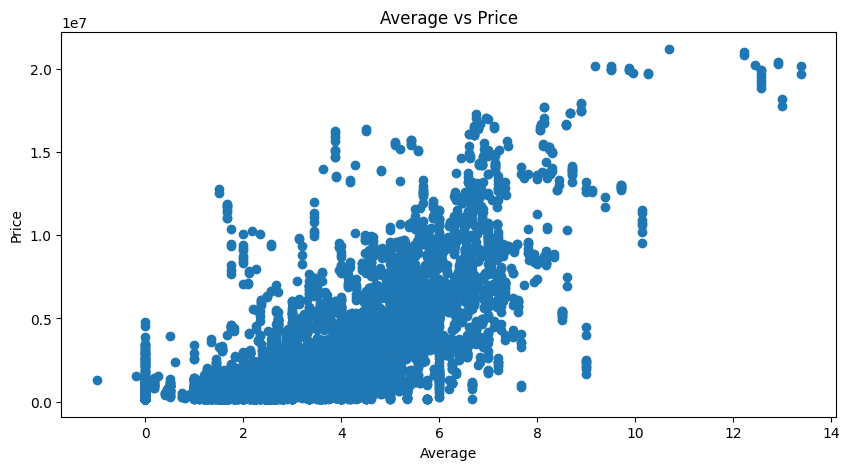

In [43]:
plt.figure(figsize=(10,5))
plt.scatter(df['Average'], df['Price'])
plt.title("Average vs Price")
plt.xlabel("Average")
plt.ylabel("Price")
plt.show()

## Conclusions

1. The team influences the performance of players significantly.
2. Position does not seem to be a category that reflects price and performance in a consistent way.
3. The average points, the games played, and the points obtained home seem to be the most important describers of price; big teams, like those from Big 6, also influence the price.